## Lab1
### Questions we can use the data to explore:

REMOVE CELL BEFORE TURN IN

1.Within DFW airport which airline has the most on time or early flights or worst delays?
    *could pick a few states or airport destinations
    
2.When is the best time to fly/What time of day has the worst delays at DFW?

### Columns we should keep from the dataset

REMOVE CELL BEFORE TURN IN
* dayname
* flightdate
* airline
* origin
* dst
* depdelay
* depdelaygroup
* dtimeblk
* distgroup


# Business Understanding

This data set is from The Department of Transportation’s Bureau of Transportation Statistics regarding the On Time Preformance of domestic flights flying from the DFW airport from January to March of this year.

According to the Airports Council International, DFW is the 12th busiest airport in the world, serving around 67 million passangers a year. When booking flights for a trip, there are often many differnt airlines and times of day to choose from. The end goal of analyis on our dataset is to be able to understand for DFW when is the best time to fly and with what airline in order to minimize departure delays when taking a trip.

# Who would benefit
Businesses who send employees on businesss trips and people taking personal trips flying through DFW would benefit from this analysis. If a flight for a business trip gets delayed or cancelled, the company loses money as hours of the client or employee's time are wasted as a result. Additionally, many people get a very limited time for vacation and personal trips. A long delay or cancellation can and casue them to lose valuable time at their destination or with their families.

Using this analysis a person or company can try to schedule thier flights to minimize likelihood of experiencing delays when flying from DFW. If a person has to fly during a time or with an airline with a high likelihood of delay or cancellation, they can use this analysis to help them plan accordingly and be sure to build in flexibility due to delays when planning thier schedules.

Airlines that fly from DFW could also use this analysis to help them see how they stack up to thier competitors and to help them better schedule thier employees. For example, during times when there is a high likelihood of delay they could have more gate and travel agent staff available.

# Model Performance
In order to be considered useful our model would have to perform........ **I think we should save this until the end so we can see how much variance there is in the things we are trying to predict.. our model should probably be between 75-99% accurate.. if there is little variance our model should probably be closer to 99% if there is larger variance our model can probably be farthur away(b/c we cant account for events like weather)

# Data Understanding

#### Data Set

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

import missingno as mn

import pandas as pd
import numpy as np

df = pd.read_csv('https://s2.smu.edu/~tyienger/aaaa-On_Time_On_Time_Performance_2018_1.csv') # read in the csv file
ddf = df
print('Pandas:', pd.__version__)
print('Numpy:',np.__version__)

Pandas: 0.20.1
Numpy: 1.12.1


In [2]:
#Filter data by needed airport
df_dallas = df[df.Origin == 'DFW']
print (df_dallas.describe())
print (df_dallas.count())

          Year  Quarter         Month    DayofMonth     DayOfWeek  \
count  66085.0  66085.0  66085.000000  66085.000000  66085.000000   
mean    2018.0      1.0      2.013876     15.509556      3.898994   
std        0.0      0.0      0.830702      8.725352      1.973865   
min     2018.0      1.0      1.000000      1.000000      1.000000   
25%     2018.0      1.0      1.000000      8.000000      2.000000   
50%     2018.0      1.0      2.000000     16.000000      4.000000   
75%     2018.0      1.0      3.000000     23.000000      6.000000   
max     2018.0      1.0      3.000000     31.000000      7.000000   

          FlightNum  OriginAirportID  DestAirportID      DepDelay  \
count  66085.000000          66085.0   66085.000000  64716.000000   
mean    2694.560959          11298.0   12867.713763      8.766209   
std     1605.094463              0.0    1585.291240     39.092864   
min        5.000000          11298.0   10136.000000    -22.000000   
25%     1427.000000          1129

#### Data Attributes

##### Question: a lot of our nominal attributes had columns that were one hot encoded in the original dataset but we left them out and kept the categories for analysis.. good idea?¶
##### Also can someone check to make sure I categorized them correctly

In [3]:
#Remove attributes that are not useful for us
for col in ['Year','Quarter','Month','monthname','DayofMonth','DayOfWeek','TailNum','FlightNum','OriginAirportID',
           'OriginCityName','OriginState','OriginStateName','DestAirportID','DestCityName','DestState','DestStateName','CRSDepTime',
           'DepDelayMinutes','TaxiIn','TaxiOut','CRSArrTime','ArrTime','ArrDelay','ArrDelayMinutes','ArrDelayGroup','ATimeBlk','CancellationReason',
            'Diverted', 'AirTime','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay','FirstDepTime1','FirstDepTime2',
            'FirstDepTime','TotalAddGTime','LongestAddGTime','DivAirportLandings','DivReachedDest','DivActualElapsedTime','DivArrDelay','DivDistance',
           'CRSElapsedTime','Flights']:
    if col in df_dallas:
        del df_dallas[col]

In [4]:
print(df_dallas.dtypes)


dayname               object
FlightDate            object
airline               object
Origin                object
Dest                  object
DepTime               object
DepDelay             float64
DepDelayGroup         object
DTimeBlk              object
Cancelled            float64
ActualElapsedTime    float64
Distance             float64
DistGroup             object
dtype: object


In [5]:
print(df_dallas.info(verbose=True, null_counts=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66085 entries, 1160 to 1702659
Data columns (total 13 columns):
dayname              66085 non-null object
FlightDate           66085 non-null object
airline              66085 non-null object
Origin               66085 non-null object
Dest                 66085 non-null object
DepTime              64736 non-null object
DepDelay             64716 non-null float64
DepDelayGroup        64716 non-null object
DTimeBlk             66085 non-null object
Cancelled            66085 non-null float64
ActualElapsedTime    64516 non-null float64
Distance             66085 non-null float64
DistGroup            66085 non-null object
dtypes: float64(4), object(9)
memory usage: 7.1+ MB
None


#### Explanation

The data we are focusing on is mainly flight delay time data so we chose to keep the colums of:
* dayname (the day of the week of the flight)
* airline (the airline of the flight)
* Origin (origin airport code of the flight)
* Dest (destination airport code of the flight)
* DepTime (departure time of the flight)
* DepDelay (delay of the flight departure)
* DepDelayGroup (delay of the flight departure grouped by minutes)
* DTimeBlk (delay of the flight grouped by hours)
* Cancelled (whether the flight was cancelled)
* ActualElapsedTime (flight time in the air)
* Distance (distance the flight travelled)
* DistGroup (distance the flight travelled grouped by miles)


#### Missing Data

In [6]:
#Figure out what data is missing
df_dallas.isnull().sum()

dayname                 0
FlightDate              0
airline                 0
Origin                  0
Dest                    0
DepTime              1349
DepDelay             1369
DepDelayGroup        1369
DTimeBlk                0
Cancelled               0
ActualElapsedTime    1569
Distance                0
DistGroup               0
dtype: int64

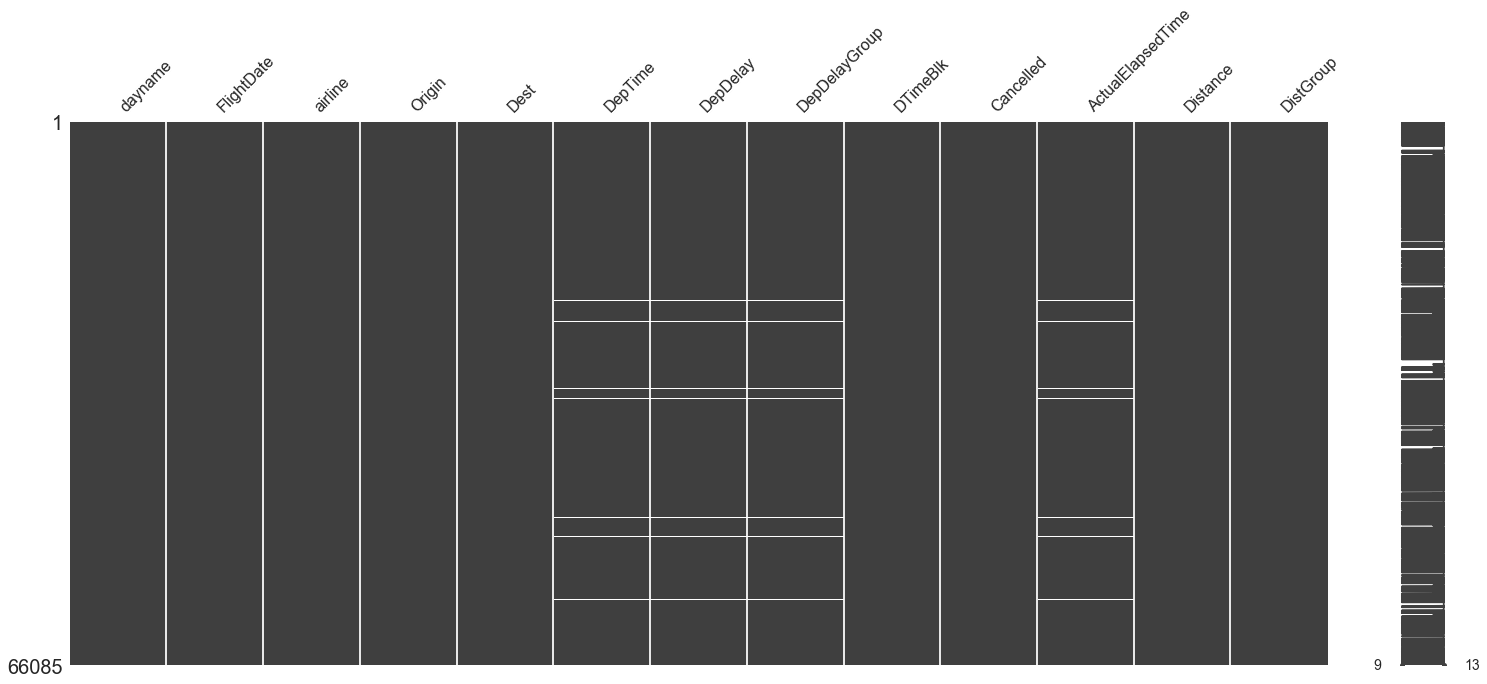

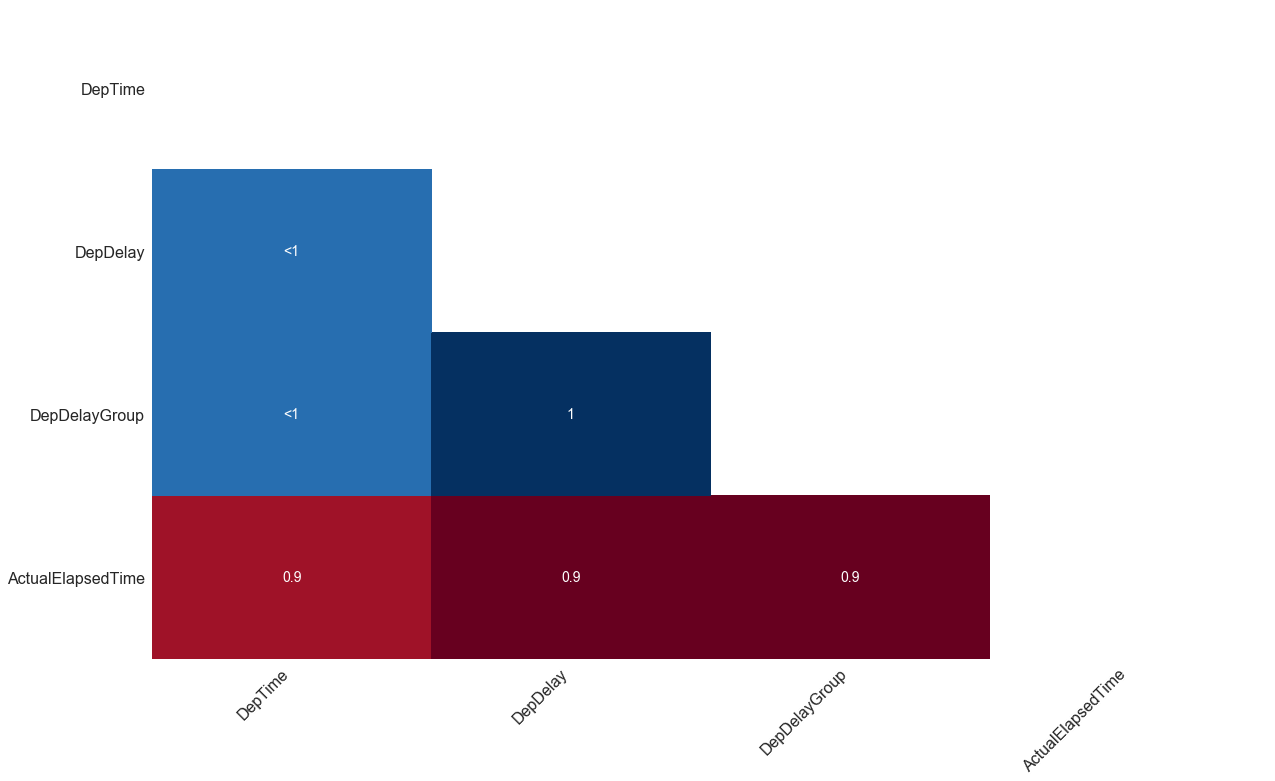

In [7]:
# Allow plot to be embedded into the notebook
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

import missingno as mn 

mn.matrix(df_dallas.sort_values(by=['Dest']))
mn.heatmap(df_dallas.sort_values(by=['Dest']))

In [63]:
#Group data by destination 
df_dallas_grouped = df_dallas.groupby(by=['Dest'])
#Show the number of unique destinations
print ("The number of unique destinations from DFW is: ", df_dallas.Dest.nunique())
print()
#Show the number of flights to each destination
df_dallas_grouped.count().sort_values(by=['DepDelay'],ascending=False)

The number of unique destinations from DFW is:  155



,dayname,FlightDate,airline,Origin,DepTime,DepDelay,DepDelayGroup,DTimeBlk,Cancelled,ActualElapsedTime,Distance,DistGroup
Dest,,,,,,,,,,,,
ORD,1810,1810,1810,1810,1810,1810,1810,1810,1810,1810,1810,1810
ATL,1645,1645,1645,1645,1645,1645,1645,1645,1645,1645,1645,1645
LAX,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577
IAH,1416,1416,1416,1416,1416,1416,1416,1416,1416,1416,1416,1416
DEN,1376,1376,1376,1376,1376,1376,1376,1376,1376,1376,1376,1376
LGA,1365,1365,1365,1365,1365,1365,1365,1365,1365,1365,1365,1365
LAS,1130,1130,1130,1130,1130,1130,1130,1130,1130,1130,1130,1130
SFO,1092,1092,1092,1092,1092,1092,1092,1092,1092,1092,1092,1092
PHX,1084,1084,1084,1084,1084,1084,1084,1084,1084,1084,1084,1084


### May need to fix warning on cell below. It is disabled for now

In [65]:
#Remove the missing data
#Need to re-slice the DFW airport data from the dataframe
df_dallas.dropna(inplace=True)
df_dallas.count()

dayname              64491
FlightDate           64491
airline              64491
Origin               64491
Dest                 64491
DepTime              64491
DepDelay             64491
DepDelayGroup        64491
DTimeBlk             64491
Cancelled            64491
ActualElapsedTime    64491
Distance             64491
DistGroup            64491
dtype: int64

#### Explanation
The missing data for the actual elapsed time was removed from the data set. This is because if the data for actual elapsed time was missing, the data for departure delay time and departure delay group was also missing. As a result of this it is unwise to impute values for the data, as their is no reasonable value to base the delay time off of. This is because all of the other attributes that have values have nothing to do with the delay time. For example, a compairison of a flight with the same airline, on the same date, to the same city shows that their is a large range of delays for different flights. This is because delay time can be affected by a myriad of factors such as mechanical factors, weather related factors, crew related factors, and due to the fact that a plane does not just magically appear in an airport but travels from a different destination where it could have also been affected by delays. Due to this, it makes no sense to try to impute the data for the missing values. See the two charts below for an example.

In [66]:
df_dallas_atl = df_dallas[df_dallas.Dest == 'ATL']
df_dallas_atl_sorted = df_dallas_atl.sort_values(by=['FlightDate','airline'], ascending = True)
df_dallas_atl_sorted.head(10)

,dayname,FlightDate,airline,Origin,Dest,DepTime,DepDelay,DepDelayGroup,DTimeBlk,Cancelled,ActualElapsedTime,Distance,DistGroup
63464,Monday,2018-01-01,American Airlines Inc.,DFW,ATL,10:52,26.0,Delay between 15 to 29 minutes,10:00AM to 10:59AM,0.0,116.0,731.0,500-749 Miles
118971,Monday,2018-01-01,American Airlines Inc.,DFW,ATL,18:39,4.0,Delay between 0 and 14 minutes,6:00PM to 6:59PM,0.0,119.0,731.0,500-749 Miles
137546,Monday,2018-01-01,American Airlines Inc.,DFW,ATL,08:49,-6.0,Delay between -15 and -1 minutes,8:00AM to 8:59AM,0.0,116.0,731.0,500-749 Miles
138049,Monday,2018-01-01,American Airlines Inc.,DFW,ATL,20:54,-1.0,Delay between -15 and -1 minutes,8:00PM to 8:59PM,0.0,117.0,731.0,500-749 Miles
404231,Monday,2018-01-01,American Airlines Inc.,DFW,ATL,16:42,-3.0,Delay between -15 and -1 minutes,4:00PM to 4:59PM,0.0,119.0,731.0,500-749 Miles
412730,Monday,2018-01-01,American Airlines Inc.,DFW,ATL,14:45,15.0,Delay between 15 to 29 minutes,2:00PM to 2:59PM,0.0,121.0,731.0,500-749 Miles
431566,Monday,2018-01-01,American Airlines Inc.,DFW,ATL,13:27,32.0,Delay between 30 to 44 minutes,12:00PM to 12:59PM,0.0,106.0,731.0,500-749 Miles
928297,Monday,2018-01-01,Delta Air Lines Inc.,DFW,ATL,16:14,14.0,Delay between 0 and 14 minutes,4:00PM to 4:59PM,0.0,120.0,731.0,500-749 Miles
937089,Monday,2018-01-01,Delta Air Lines Inc.,DFW,ATL,09:32,-3.0,Delay between -15 and -1 minutes,9:00AM to 9:59AM,0.0,107.0,731.0,500-749 Miles
937500,Monday,2018-01-01,Delta Air Lines Inc.,DFW,ATL,12:32,32.0,Delay between 30 to 44 minutes,12:00PM to 12:59PM,0.0,111.0,731.0,500-749 Miles


In [67]:
df_dallas_atl_sorted.DepDelay.describe()

count    1645.000000
mean        8.865046
std        40.949527
min       -15.000000
25%        -5.000000
50%        -2.000000
75%         5.000000
max       486.000000
Name: DepDelay, dtype: float64

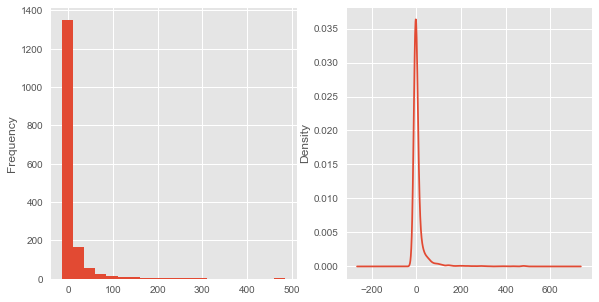

In [50]:
# Start by just plotting what we previously grouped!
plt.style.use('ggplot')

fig = plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
df_dallas_atl_sorted.DepDelay.plot.hist(bins=20)

plt.subplot(1,3,2)
df_dallas_atl_sorted.DepDelay.plot.kde(bw_method=0.2)


In [56]:
#dallas grouped by dest sorted by mean departure delay ascending
df_dallas_grouped = df_dallas.groupby(by=['Dest']).mean().reset_index() #makes it back into a dataframe
df_dallas_grouped_depTime = df_dallas_grouped.sort_values(by=['DepDelay'], ascending = True)
df_dallas_grouped_depTime.head(10)

,Dest,DepDelay,Cancelled,ActualElapsedTime,Distance
68,ILM,-0.333333,0.0,150.666667,1106.0
129,SBA,2.159091,0.0,211.670455,1316.0
50,GCK,2.587571,0.0,89.627119,404.0
53,GJT,2.612335,0.0,136.502203,773.0
10,BIL,2.766667,0.0,185.633333,1081.0
150,TXK,2.818584,0.0,58.712389,181.0
142,SPS,3.108871,0.0,54.112903,113.0
123,ROW,3.201717,0.0,93.948498,435.0
20,BZN,3.297872,0.0,198.851064,1163.0
154,XNA,3.328767,0.0,69.417808,280.0


In [ ]:
#dallas grouped by dest sorted by mean departure delay descending

In [52]:
df_dallas_grouped_depTime = df_dallas_grouped.sort_values(by=['DepDelay'], ascending = False)
df_dallas_grouped_depTime.head(10)

,Dest,DepDelay,Cancelled,ActualElapsedTime,Distance
115,PIB,161.459343,0.0,9.036991,0.0
84,LIH,109.518487,0.0,20.661428,0.0
104,OGG,76.755040,0.0,20.355147,0.0
25,CLE,71.766831,0.0,12.386533,0.0
97,MLU,68.583984,0.0,12.789865,0.0
83,LGA,66.851897,0.0,14.897583,0.0
77,LAW,65.108858,0.0,9.535267,0.0
5,ASE,63.753801,0.0,19.714255,0.0
31,COU,63.750837,0.0,9.407719,0.0
73,JFK,63.697647,0.0,16.309853,0.0


In [54]:
df_dallas_grouped = df_dallas.groupby(by=['Dest']).std().reset_index() 
df_dallas_grouped_depTime = df_dallas_grouped.sort_values(by=['DepDelay'], ascending = False)
df_dallas_grouped_depTime.head(10)

,Dest,DepDelay,Cancelled,ActualElapsedTime,Distance
115,PIB,161.459343,0.0,9.036991,0.0
84,LIH,109.518487,0.0,20.661428,0.0
104,OGG,76.755040,0.0,20.355147,0.0
25,CLE,71.766831,0.0,12.386533,0.0
97,MLU,68.583984,0.0,12.789865,0.0
83,LGA,66.851897,0.0,14.897583,0.0
77,LAW,65.108858,0.0,9.535267,0.0
5,ASE,63.753801,0.0,19.714255,0.0
31,COU,63.750837,0.0,9.407719,0.0
73,JFK,63.697647,0.0,16.309853,0.0



## Items left to finish:
* Look at question about data attributes
* Data Visualization:
    * Choose and visualize distributions for a subset of single attributes
        * Visualize at least 5 attributes, at least one categorical and at least one numeric.
    * Visualize relationships between a subset of attributes
        * Interpret the implications for each visualization. 
        * Visualize at least three subsets of the attributes.
*Exceptional Work
    *Ideas? Backup plan do grad part